In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def euler_sde_network(time, initial_condition, drift_function, diffusion_constant):
    """
    Solves a system of N stochastic differential equations using the Euler-Maruyama method.

    Args:
        time (np.ndarray): Array of time points.
        initial_condition (np.ndarray): Array of initial values for each of the N variables.
        drift_function (callable): Function that computes the drift term for all N variables.
                                   It should take the current state (a numpy array of length N)
                                   and return the derivatives (a numpy array of length N).
        diffusion_constant (float): The standard deviation of the independent noise term for each oscillator.

    Returns:
        np.ndarray: Array of the variables' values at each time point (shape: num_steps x N).
    """
    dt = time[1] - time[0]
    num_steps = len(time)
    N = len(initial_condition)
    solution = np.zeros((num_steps, N))
    solution[0, :] = initial_condition
    dW = np.random.normal(loc=0, scale=np.sqrt(dt), size=(num_steps - 1, N))
    for i in range(num_steps - 1):
        solution[i + 1, :] = solution[i, :] + drift_function(solution[i, :]) * dt + diffusion_constant * dW[i, :]
    return solution



In [3]:
def theta_model_network(theta, I, K, A):
    """
    Computes the drift term of the coupled stochastic theta model for N oscillators.

    Args:
        theta (np.ndarray): Array of the current phases of the N oscillators (length N).
        I (float): The common input current to all oscillators.
        K (float): The global coupling strength.
        A (np.ndarray): The adjacency matrix of the network (N x N). A[i, j] = 1 if j is connected to i, 0 otherwise.
                         The diagonal of A should be zero.

    Returns:
        np.ndarray: Array of the drift terms d(theta_i)/dt for each oscillator i (length N).
    """
    N = len(theta)
    theta_dot = np.zeros(N)
    interaction_term = K / N * np.dot(A, (1 - np.cos(theta)))
    for i in range(N):
        theta_dot[i] = (1 - np.cos(theta[i])) + (1 + np.cos(theta[i])) * I + interaction_term[i]
    return theta_dot


In [4]:
def plot_signals(time, signals, title="Oscillator Phases"):
    """
    Plots the time series of multiple signals.

    Args:
        time (np.ndarray): Array of time points.
        signals (np.ndarray): 2D array where each column represents a signal.
        title (str): Title of the plot.
    """
    num_signals = signals.shape[1]
    plt.figure(figsize=(12, 6))
    for i in range(num_signals):
        plt.plot(time, signals[:, i], label=f'Oscillator {i+1}')
    plt.xlabel('Time')
    plt.ylabel('θ')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()


In [5]:
if __name__ == "__main__":
    # Parameters
    N = 5  # Number of oscillators
    t_start = 0
    t_end = 100
    dt = 0.1
    time = np.arange(t_start, t_end, dt)
    sigma = 0.1
    I = -1.0
    K_values = [1, 10, 20]

    # Initial conditions (random for each oscillator)
    theta_0 = 2 * np.pi * np.random.rand(N)


In [6]:
if __name__ == "__main__":
    # Parameters
    N = 5  # Number of oscillators
    t_start = 0
    t_end = 100
    dt = 0.1
    time = np.arange(t_start, t_end, dt)
    sigma = 0.1
    I = -1.0
    K_values = [1, 10, 20]

    # Initial conditions (random for each oscillator)
    theta_0 = 2 * np.pi * np.random.rand(N)


Simulating fully connected network...

Running simulation with K = 1


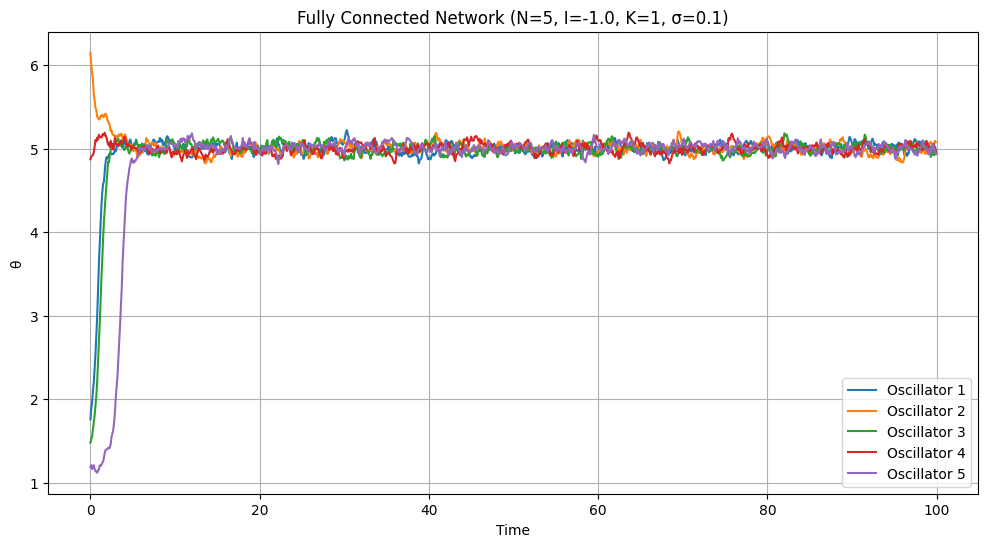

Interpretation:
- With weak coupling (K=1), the oscillators tend to behave relatively independently, influenced mainly by their initial conditions and the common input and noise. You might see some weak synchronization or desynchronization depending on the noise realization.

Running simulation with K = 10


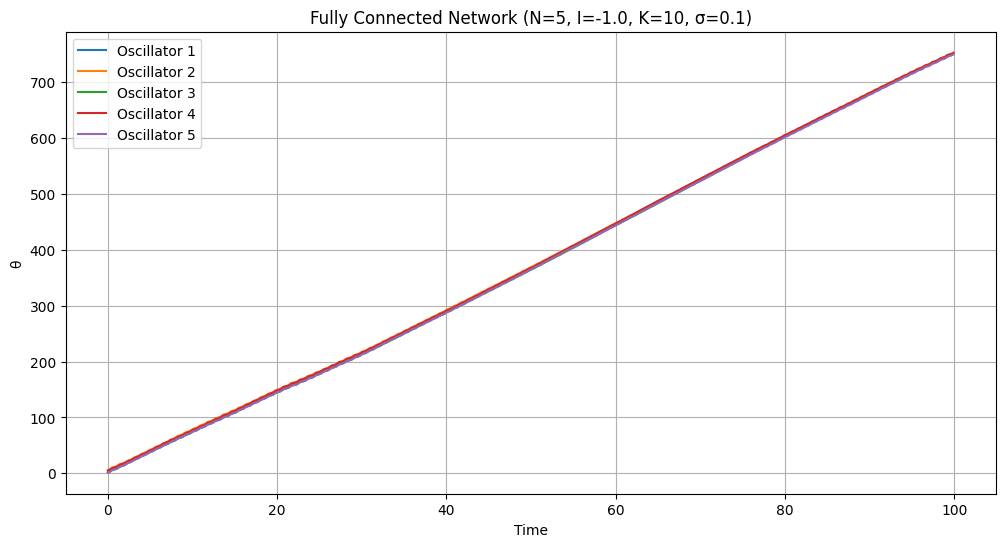

Interpretation:
- With moderate coupling (K=10), the interaction term becomes significant. The oscillators will start to influence each other more strongly, leading to increased synchronization. You might observe groups of oscillators with similar phases or even global synchronization where all oscillators tend to move together.

Running simulation with K = 20


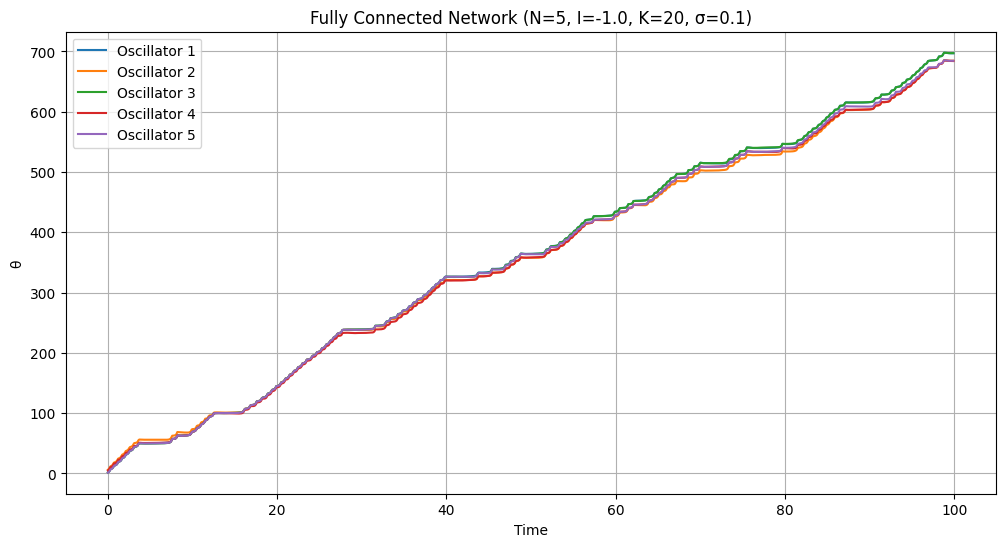

Interpretation:
- With strong coupling (K=20), the network is highly coherent. The interaction dominates the dynamics, and you are likely to see strong global synchronization where all oscillators have very similar phases and evolve together. The noise might cause small deviations from perfect synchrony, but the overall behavior will be highly correlated.


In [7]:
    # 8. Fully connected network
    A_fully_connected = np.ones((N, N)) - np.eye(N)  # All-to-all with no self-connections

    print("Simulating fully connected network...")
    for K in K_values:
        print(f"\nRunning simulation with K = {K}")
        num_realizations = 3
        all_theta_t = []
        for _ in range(num_realizations):
            theta_t = euler_sde_network(time, theta_0, lambda theta: theta_model_network(theta, I, K, A_fully_connected), sigma)
            all_theta_t.append(theta_t)

        # Plot the results for the last realization
        plot_signals(time, all_theta_t[-1], title=f'Fully Connected Network (N={N}, I={I}, K={K}, σ={sigma})')

        print("Interpretation:")
        if K == 1:
            print("- With weak coupling (K=1), the oscillators tend to behave relatively independently, influenced mainly by their initial conditions and the common input and noise. You might see some weak synchronization or desynchronization depending on the noise realization.")
        elif K == 10:
            print("- With moderate coupling (K=10), the interaction term becomes significant. The oscillators will start to influence each other more strongly, leading to increased synchronization. You might observe groups of oscillators with similar phases or even global synchronization where all oscillators tend to move together.")
        elif K == 20:
            print("- With strong coupling (K=20), the network is highly coherent. The interaction dominates the dynamics, and you are likely to see strong global synchronization where all oscillators have very similar phases and evolve together. The noise might cause small deviations from perfect synchrony, but the overall behavior will be highly correlated.")



Simulating fully connected network with N = 10...


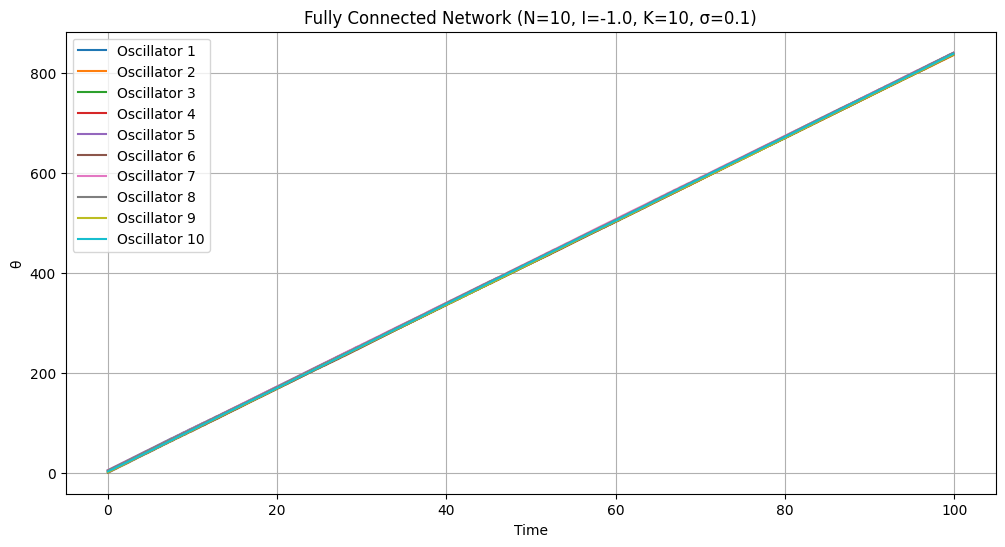

Observations for larger network (N=10):
- With a larger number of coupled oscillators, the tendency towards synchronization observed with K=10 in the smaller network might become more pronounced or more complex. You might see the emergence of synchronized clusters or a more globally synchronized state, depending on the noise realization and the homogeneity of the oscillators.
- The dynamics can become richer as the number of interacting elements increases, potentially exhibiting more intricate patterns of synchronization and desynchronization.


In [8]:
    # 9. Increase network size
    N_large = 10
    theta_0_large = 2 * np.pi * np.random.rand(N_large)
    A_fully_connected_large = np.ones((N_large, N_large)) - np.eye(N_large)
    K = 10
    print(f"\nSimulating fully connected network with N = {N_large}...")
    theta_t_large = euler_sde_network(time, theta_0_large, lambda theta: theta_model_network(theta, I, K, A_fully_connected_large), sigma)
    plot_signals(time, theta_t_large, title=f'Fully Connected Network (N={N_large}, I={I}, K={K}, σ={sigma})')

    print("Observations for larger network (N=10):")
    print("- With a larger number of coupled oscillators, the tendency towards synchronization observed with K=10 in the smaller network might become more pronounced or more complex. You might see the emergence of synchronized clusters or a more globally synchronized state, depending on the noise realization and the homogeneity of the oscillators.")
    print("- The dynamics can become richer as the number of interacting elements increases, potentially exhibiting more intricate patterns of synchronization and desynchronization.")



Simulating fully connected network (I=-1.2)...


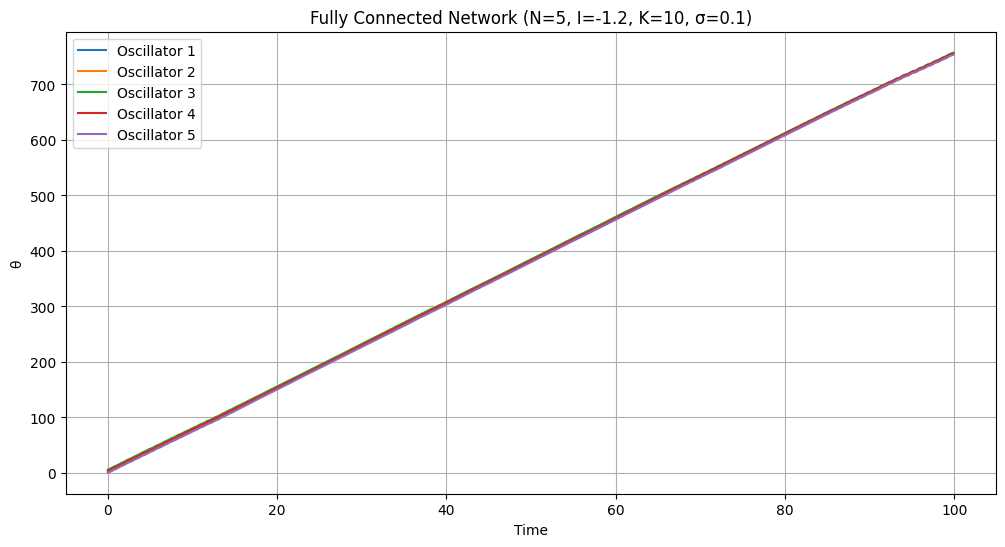


Simulating random network (I=-1.2)...


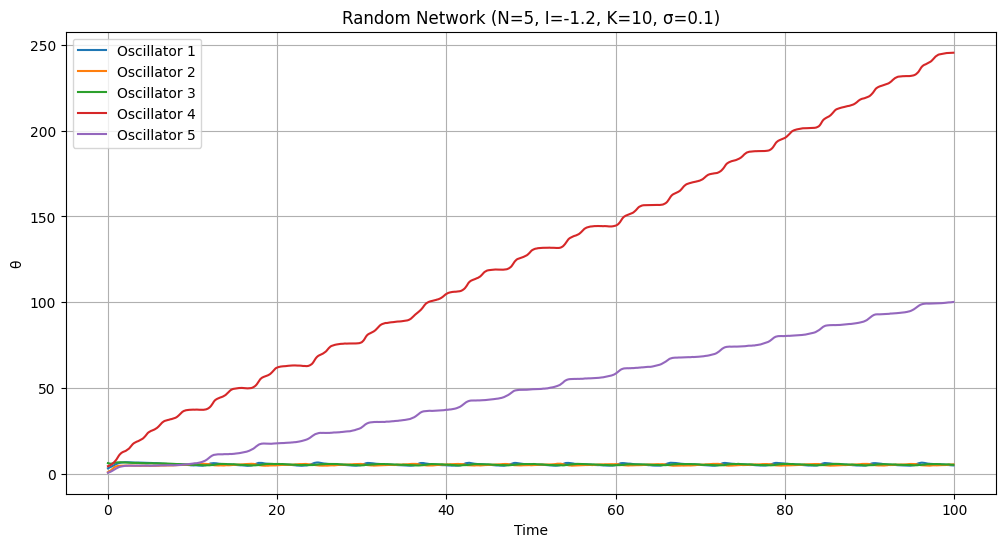


Interpretation of healthy vs. epileptic brain networks:
- **Healthy brain network (Random network):** A random network structure suggests a more diverse and less predictable pattern of connections. In such a network, with I = -1.2 (closer to the point where individual oscillators might become excitable), the activity might be more localized or involve smaller, transiently synchronized groups. The overall activity is less likely to become globally synchronized and exhibit large, sudden bursts of activity.
- **Epileptic brain network (Fully connected network):** A fully connected network, especially with strong coupling (K=10) and an input current (I = -1.2) that pushes individual oscillators closer to excitation, is more prone to hypersynchronization. If many neurons are strongly interconnected, a small perturbation or a few firing neurons can quickly propagate activity throughout the network, leading to a large-scale, synchronous firing of neuronal populations. This widespread, synchr

In [9]:
    # 10. Random network vs. fully connected network (I = -1.2)
    I_epilepsy = -1.2
    N_default = 5
    theta_0_default = 2 * np.pi * np.random.rand(N_default)
    K_default = 10

    # Fully connected (healthy-like)
    A_fully_connected_default = np.ones((N_default, N_default)) - np.eye(N_default)
    print(f"\nSimulating fully connected network (I={I_epilepsy})...")
    theta_t_fc = euler_sde_network(time, theta_0_default, lambda theta: theta_model_network(theta, I_epilepsy, K_default, A_fully_connected_default), sigma)
    plot_signals(time, theta_t_fc, title=f'Fully Connected Network (N={N_default}, I={I_epilepsy}, K={K_default}, σ={sigma})')

    # Random network (epileptic-like)
    A_random = np.random.rand(N_default, N_default)
    A_random = (A_random < 0.5).astype(int)
    np.fill_diagonal(A_random, 0)  # No self-connections
    print(f"\nSimulating random network (I={I_epilepsy})...")
    theta_t_random = euler_sde_network(time, theta_0_default, lambda theta: theta_model_network(theta, I_epilepsy, K_default, A_random), sigma)
    plot_signals(time, theta_t_random, title=f'Random Network (N={N_default}, I={I_epilepsy}, K={K_default}, σ={sigma})')

    print("\nInterpretation of healthy vs. epileptic brain networks:")
    print("- **Healthy brain network (Random network):** A random network structure suggests a more diverse and less predictable pattern of connections. In such a network, with I = -1.2 (closer to the point where individual oscillators might become excitable), the activity might be more localized or involve smaller, transiently synchronized groups. The overall activity is less likely to become globally synchronized and exhibit large, sudden bursts of activity.")
    print("- **Epileptic brain network (Fully connected network):** A fully connected network, especially with strong coupling (K=10) and an input current (I = -1.2) that pushes individual oscillators closer to excitation, is more prone to hypersynchronization. If many neurons are strongly interconnected, a small perturbation or a few firing neurons can quickly propagate activity throughout the network, leading to a large-scale, synchronous firing of neuronal populations. This widespread, synchronous activity is analogous to the spiky activity observed during epileptic seizures.")
    print("- Therefore, the **random network** might be considered analogous to a **healthy brain network** with more distributed and less synchronized activity, while the **fully connected network** could represent an **epileptic brain network** that is more susceptible to hypersynchronization and seizure-like activity.")
